In [27]:
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RepeatedKFold 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df_best_model = pd.read_csv("data/results_class.csv", index_col=0)
df_best_model

,model,accuracy_score,precision_score,recall_score,f1_score
0,GaussianNB,0.447178,0.966480,0.261209,0.411266
1,LogisticRegression,0.859562,0.902158,0.908554,0.905344
2,KNeighborsClassifier,0.820401,0.869521,0.890698,0.879982
3,SVM_k_lineal,0.857136,0.906409,0.899626,0.903005


Debido a su mejor desempeño y bajo coste computacional se escoge una regresión logística

## Mejora del modelo seleccionado regresión logística

En esta parte no se hará mucho énfasis en la preparación de los datos ya que en el notebook model_v1.ipynb se hace de manera mas detallada aquí la idea es mejorar le modelo escogido

In [3]:
SEED = 137 # semilla aleatoria para la reproducibilidad del análisis

In [4]:
df = pd.read_csv("data/data_clean.csv", index_col=0)

In [5]:
df = df.drop(columns=["numero_aviso", # esta variable solo indica el identificador incidente
                      "marca", # esta variable tiene baja correlación y alta cardinalidad, es un identificador
                      "accion_modelo", # variable que vien de un módelo anterior
                      "linea", # es un identificador
                      "nombre" # esta variable tien mucha correlación con el codigo iris
                     ])

In [6]:
df["grupo"] = df["grupo"].astype(str)
df["subgrupo"] = df["subgrupo"].astype(str)

In [7]:
y_temp = pd.get_dummies(df["accion"])

In [8]:
y = y_temp["cambiar"].values
y

array([1, 1, 1, ..., 1, 1, 0], dtype=uint8)

In [9]:
df = df.drop(columns=["accion"]) # ahora esta variable es denominada y

In [10]:
df_model = pd.get_dummies(df)

In [11]:
X = df_model.values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=SEED)

### Optimización de hiperparámetros con GridSearchCV

In [13]:
lr_class = LogisticRegression(max_iter=200)
grid = {'C':[0.5, 1, 1.5, 2, 2.5],
        "solver": ['lbfgs', 'liblinear']}

In [14]:
lr_class_grid = GridSearchCV(lr_class, # modelo
                             grid, # grid
                             n_jobs=8, # numéro de hilos
                             cv=10) # validación cruzada iterativa
                            
lr_class_grid_fit =  lr_class_grid.fit(X_train, y_train)

/home/oscar/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/oscar/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

/home/oscar/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/oscar/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

/home/oscar/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/oscar/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

/home/oscar/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/oscar/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

In [18]:
pd.concat([pd.DataFrame(lr_class_grid_fit.cv_results_["params"]),
           pd.DataFrame(lr_class_grid_fit.cv_results_["mean_test_score"], 
                        columns=["Accuracy"])], axis=1)

,C,solver,Accuracy
0,0.5,lbfgs,0.857822
1,0.5,liblinear,0.857822
2,1.0,lbfgs,0.858077
3,1.0,liblinear,0.858041
4,1.5,lbfgs,0.858113
5,1.5,liblinear,0.858235
6,2.0,lbfgs,0.858138
7,2.0,liblinear,0.858247
8,2.5,lbfgs,0.857992
9,2.5,liblinear,0.858089


In [17]:
# mejor modelo de los anteriores
print(f'Best parameters: {lr_class_grid_fit.best_params_}')
print(f'Best score: {lr_class_grid_fit.best_score_}')

Best parameters: {'C': 2, 'solver': 'liblinear'}
Best score: 0.8582467949171788


### Se validan las predicciones del modelo con los datos de test

In [24]:
y_pred_lr_grid = lr_class_grid_fit.predict(X_test)

print('##--  LogisticRegression Grid Search & CV --## ')
print(f'Acuraccy: {accuracy_score(y_test, y_pred_lr_grid)}')
print(f'Precision: {precision_score(y_test, y_pred_lr_grid)}')
print(f'Recall: {recall_score(y_test, y_pred_lr_grid)}')
print(confusion_matrix(y_test, y_pred_lr_grid))

##--  LogisticRegression Grid Search & CV --## 
Acuraccy: 0.8591740670645897
Precision: 0.9027895733977919
Recall: 0.907175211711416
[[ 3886  1488]
 [ 1414 13819]]


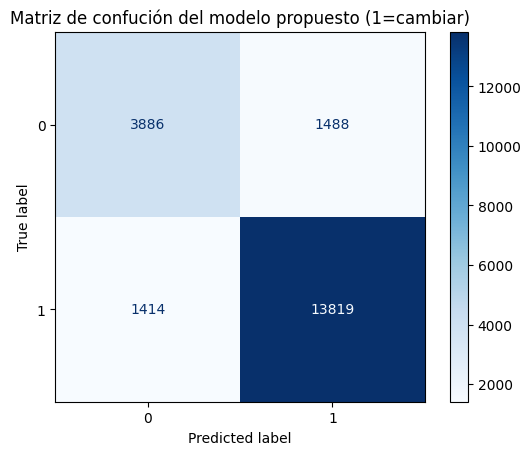

In [35]:
cm = confusion_matrix(y_test, y_pred_lr_grid)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("Matriz de confución del modelo propuesto (1=cambiar)")
plt.show()

In [20]:
# guardar le modelo para poner en el demo
dump(lr_class, 'model/lr_class.joblib') 

['model/lr_class.joblib']